## sympy で量子演算のシミュレーション

量子計算のシミュレータツールとしてはIBM社のqiskitやGoogleのCirqなどありますが、代表的な数値計算ライブラリであるsympyでも出来るようなので、簡単ですがやってみます。

以下のサイトを参照しました。
- https://docs.sympy.org/latest/index.html
- https://dojo.qulacs.org/ja/latest/notebooks/1.2_qubit_operations.html
- https://qiita.com/openql/items/e5b98bcd13fb4f0b6d59


### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/sympy/qc/qc_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/sympy/qc/qc_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G6020


In [2]:
!python -V

Python 3.7.3


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)

matplotlib version : 3.0.3
scipy version : 1.4.1
numpy version : 1.19.4


## 量子ビットの表記

sympyそのものと、表記を簡単にするためのrepresent、ブラケット記号で量子ビットを指定することが出来るQubitとQubitBraをimportしておきます。

In [4]:
import sympy
from sympy.physics.quantum import represent
from sympy.physics.quantum.qubit import Qubit
from sympy.physics.quantum.qubit import QubitBra
from sympy.physics.quantum.dagger import Dagger
sympy.init_printing()

In [5]:
print('sympy version : ', sympy.__version__)

sympy version :  1.3


1量子ビットをブラケット記号を用いて指定します。

In [6]:
# 1量子ビット
q0 = Qubit('0')
q1 = Qubit('1')
p0 = QubitBra('1')
p1 = QubitBra('1')

In [7]:
q0

In [8]:
q1

In [9]:
p0

In [10]:
p1

representを用いてベクトルで表記できます。

In [11]:
represent(q0)

⎡1⎤
⎢ ⎥
⎣0⎦

In [12]:
represent(q0)

⎡1⎤
⎢ ⎥
⎣0⎦

In [13]:
represent(p0)

[0  1]

In [14]:
represent(p0)

[0  1]

2量子系も同様に可能です。

In [15]:
# 2量子ビット
q00 = Qubit('00')
q01 = Qubit('01')
q10 = Qubit('10')
q11 = Qubit('11')

In [16]:
represent(q00)

⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [17]:
represent(q01)

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [18]:
represent(q10)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [19]:
represent(q11)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

### 任意の状態

In [20]:
a, b = sympy.symbols('alpha, beta')
psi = a * q0 + b* q1
psi

In [21]:
from sympy.physics.quantum.qapply import qapply
qapply(Dagger(psi) * psi)

## 量子ゲート
まずは1量子ビットに対する演算子からです。
基本的には恒等演算子($I$)、パウリ演算子($X$,$Y$,$Z$)、重ね合わせ状態を作成するアダマール演算子($H$)、位相演算子($ST$,$T$)になります。実際にsympy上でどう定義されているのか見た方がわかりやすいです。

In [22]:
from sympy.physics.quantum.gate import I, X, Y, Z, H, S, T

In [23]:
print(type(I))
print(X)
print(Y)
print(Z)
print(H)
print(S)
print(T)

<class 'sympy.core.numbers.ImaginaryUnit'>
<class 'sympy.physics.quantum.gate.XGate'>
<class 'sympy.physics.quantum.gate.YGate'>
<class 'sympy.physics.quantum.gate.ZGate'>
<class 'sympy.physics.quantum.gate.HadamardGate'>
<class 'sympy.physics.quantum.gate.PhaseGate'>
<class 'sympy.physics.quantum.gate.TGate'>


In [24]:
represent(X(0), nqubits=1)

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [25]:
represent(X(1), nqubits=2)

⎡0  0  1  0⎤
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎣0  1  0  0⎦

In [26]:
represent(Y(0), nqubits=1)

⎡0  -ⅈ⎤
⎢     ⎥
⎣ⅈ  0 ⎦

In [27]:
represent(Z(0), nqubits=1)

⎡1  0 ⎤
⎢     ⎥
⎣0  -1⎦

In [28]:
represent(H(0),nqubits=1)

⎡1    1  ⎤
⎢──   ── ⎥
⎢√2   √2 ⎥
⎢        ⎥
⎢1   -√2 ⎥
⎢──  ────⎥
⎣√2   2  ⎦

In [29]:
represent(S(0),nqubits=1)

⎡1  0⎤
⎢    ⎥
⎣0  ⅈ⎦

In [30]:
represent(T(0),nqubits=1)

⎡1   0  ⎤
⎢       ⎥
⎢    ⅈ⋅π⎥
⎢    ───⎥
⎢     4 ⎥
⎣0  ℯ   ⎦

## 1量子ゲートの演算

実際にゲートを作用させてみます。そのためにはqapplyというメソッドを利用します。式を定義してから実際に関数を作用させる形を取ります。$\left| 0\right>$に対してXゲートを作用させます。

In [31]:
from sympy.physics.quantum.qapply import qapply

In [32]:
X(0) * q0

In [33]:
qapply(X(0) * q0)

アダマールゲートを利用し、重ね合わせ状態のビットに対して演算を行います。

In [34]:
qapply(H(0)*q0)

In [35]:
qapply(Z(0)*H(0)*q0)

### 測定
量子コンピュータの最終的な出力結果は測定という行為を行わないといけません。measure_allで全方向（全直交基底）に対する測定を行い、measure_partialで部分的な基底に対する測定を行います。

In [36]:
from sympy.physics.quantum.qubit import measure_all, measure_partial

_ = qapply(Z(0)*H(0)*q0)

In [37]:
represent(_)

⎡ √2 ⎤
⎢ ── ⎥
⎢ 2  ⎥
⎢    ⎥
⎢-√2 ⎥
⎢────⎥
⎣ 2  ⎦

In [38]:
measure_all(_)

In [39]:
measure_all(q0)

In [40]:
measure_all(q00)

In [55]:
measure_partial(q00, (0,))

In [70]:
measure_partial(q00, (1))

In [61]:
qapply(H(0)*H(1)*Qubit('00'))

In [69]:
measure_partial(qapply(H(0)*H(1)*Qubit('00')), (0,))

In [63]:
measure_partial(qapply(H(0)*H(1)*Qubit('00')), (1,))

In [65]:
measure_partial(qapply(H(0)*H(1)*Qubit('00')), (2,))

In [73]:
aaa = 1 / sympy.sqrt(2) * q00 + 1 / sympy.sqrt(2) * q11

In [74]:
measure_all(aaa)

In [76]:
measure_partial(aaa, (1, ))

この結果をSymPyでも計算してみよう。SymPyには測定用の関数が数種類用意されていて、一部の量子ビットを測定した場合の確率と測定後の状態を計算するには、measure_partialを用いればよい。測定する状態と、測定を行う量子ビットのインデックスを引数として渡すと、測定後の状態と測定の確率の組がリストとして出力される。1つめの量子ビットが0だった場合の量子状態と確率は[0]要素を参照すればよい。

https://dojo.qulacs.org/ja/latest/notebooks/1.3_multiqubit_representation_and_operations.html

## 2量子系の演算

### CNOT、SWAPゲート

CNOTゲートのsympy上の定義は以下の通り。第一引数が制御ビット、第二引数がターゲットビットです。

```text
This gate performs the NOT or X gate on the target qubit if the control
qubits all have the value 1.

Parameters
----------
label : tuple
    A tuple of the form (control, target).

```

In [41]:
from sympy.physics.quantum.gate import CNOT, SWAP

In [77]:
represent(CNOT(1,0),nqubits=2

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣0  0  1  0⎦

In [86]:
qapply(CNOT(1,0) * q00)

In [87]:
qapply(CNOT(1,0) * q01)

In [88]:
qapply(CNOT(1,0) * q10)

In [89]:
qapply(CNOT(1,0) * q11)

In [82]:
represent(SWAP(0,1),nqubits=2)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [90]:
qapply(SWAP(0,1) * q00)

In [92]:
qapply(SWAP(0,1) * q01)

In [95]:
qapply(SWAP(0,1) * q10)

In [94]:
qapply(SWAP(0,1) * q11)

### テンソル積

In [42]:
a, b, c, d = sympy.symbols('alpha,beta,gamma,delta')
psi = a * q0 + b * q1
phi = c * q0 + d * q1

In [43]:
psi

In [44]:
phi

テンソル積の計算をするには、TensorProductを利用します。

In [45]:
from sympy.physics.quantum import TensorProduct
TensorProduct(psi, phi)

In [46]:
represent(TensorProduct(psi, phi))

⎡α⋅γ⎤
⎢   ⎥
⎢α⋅δ⎥
⎢   ⎥
⎢β⋅γ⎥
⎢   ⎥
⎣β⋅δ⎦

### 測定

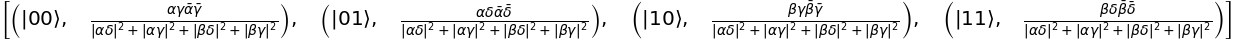

In [47]:
measure_all(TensorProduct(psi, phi))

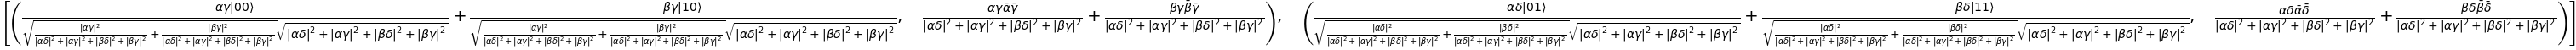

In [48]:
measure_partial(TensorProduct(psi, phi), (0,))

In [53]:
from sympy.physics.quantum.qubit import Qubit
from sympy.physics.quantum.gate import H, CNOT
from sympy.physics.quantum.qapply import qapply
bell = {}
# to Bell
for yx in ['00', '10', '01', '11']:
  result = qapply(CNOT(0,1)*H(0)*Qubit(yx))
  bell[yx] = result
  print (f'{yx} -> ', result)
# from Bell
for i, state in bell.items():
  result = qapply(H(0)*CNOT(0,1)*state)
  print(f'beta{i} -> ', result)

00 ->  sqrt(2)*|00>/2 + sqrt(2)*|11>/2
10 ->  sqrt(2)*|01>/2 + sqrt(2)*|10>/2
01 ->  sqrt(2)*|00>/2 - sqrt(2)*|11>/2
11 ->  -sqrt(2)*|01>/2 + sqrt(2)*|10>/2
beta00 ->  |00>
beta10 ->  |10>
beta01 ->  |01>
beta11 ->  |11>


In [54]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE
init_printing()